A Multilayer Neural Network implementation using TensorFlow library.

This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)


In [40]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

import seaborn as sn
import pandas as pd

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [52]:
# Learning parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256  # 1st layer number of hidden units
n_hidden_2 = 256  # 2nd layer number of hidden units

n_input = 784  # MNIST data input (img shape: 28 * 28)
n_classes = 10  # MNIST total classes (0-9 digits)

# input
x = tf.placeholder("float", [None, n_input])
# output
y = tf.placeholder("float", [None, n_classes])

# weight & bias
W = {
  'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

b = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': tf.Variable(tf.random_normal([n_hidden_2])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

# Define the model with two hidden and one output layer
def multilayer_nn(x, weights, biases):
    # Define two connected hidden layers with RELU activations
    layer_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
    
    # Define the output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    # Define the output layer with non-linear activation
    #out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out']) + biases['out'])
    #out_layer = tf.nn.softmax(tf.matmul(layer_2, weights['out']) + biases['out'])
    
    
    return out_layer
  
# Construct model
pred = multilayer_nn(x, W, b)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()


start_time = time.time()
cost_history = np.empty(shape=[1], dtype=float)

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size) # 
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost = ", "{:.9f}".format(avg_cost))
            cost_history = np.append(cost_history, avg_cost)
    print("Optimization Finished!")
    
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    test_accuracy = sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels})
    print("Accuracy:", test_accuracy)
    
    # Plot a confusion matrix (true labels vs predictions using tf.confusion_matrix)
    confusion = tf.confusion_matrix(labels = tf.argmax(mnist.test.labels, 1), predictions = tf.argmax(pred, 1))
    confusion_matrix = confusion.eval({x:mnist.test.images, y:mnist.test.labels})
    print(confusion_matrix)
    
end_time = time.time()
print("Time (seconds) taken for training and test: ", (end_time - start_time))

Epoch: 0001 cost =  186.978421933
Epoch: 0002 cost =  41.693243795
Epoch: 0003 cost =  26.251634243
Epoch: 0004 cost =  18.354388829
Epoch: 0005 cost =  13.541550221
Epoch: 0006 cost =  9.881521330
Epoch: 0007 cost =  7.313460219
Epoch: 0008 cost =  5.420955046
Epoch: 0009 cost =  4.005038046
Epoch: 0010 cost =  2.968191270
Epoch: 0011 cost =  2.215422876
Epoch: 0012 cost =  1.660217714
Epoch: 0013 cost =  1.237009431
Epoch: 0014 cost =  0.886351037
Epoch: 0015 cost =  0.795961219
Optimization Finished!
Accuracy: 0.947
[[ 957    1    3    2    0    4    5    1    4    3]
 [   0 1099    5    3    1    4    5   10    8    0]
 [   5    6  964   22    1    2    7    8   16    1]
 [   1    0   10  960    1   14    1    3    8   12]
 [   0    0    4    1  936    4   14    2    3   18]
 [   4    0    1   15    6  828   11    4   12   11]
 [   8    3    4    2    6    7  919    2    7    0]
 [   1    2    5    9    2    5    0  981    5   18]
 [   8    1   11   29    6   16    4    8  880   11

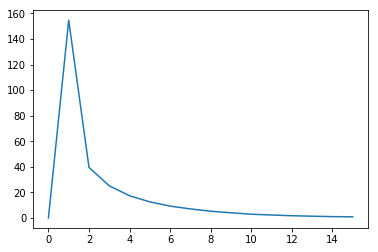

In [39]:
# Plot the cost vs iteration
plt.plot(range(len(cost_history)), cost_history)

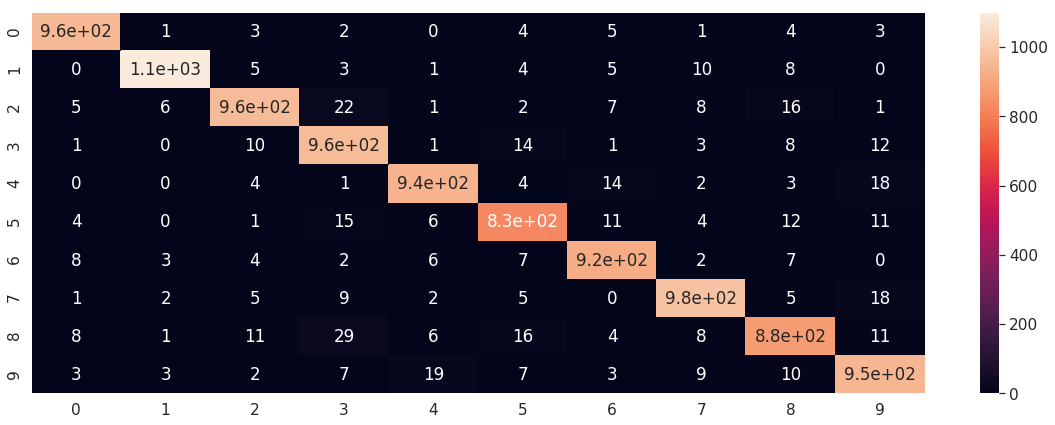

In [54]:
# Plot the confusion matrix
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (20,7))
sn.heatmap(df_cm, annot=True)